In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def smooth(arr, alpha=0.1):
    smoothed = []
    for i in range(len(arr)):
        if i == 0:
            smoothed.append(arr[i])
        else:
            smoothed.append((1-alpha)*smoothed[-1]+alpha*arr[i])
    return np.array(smoothed)

In [21]:
def smooth(arr, alpha=0.1):
    smoothed = []
    for i in range(len(arr)):
        if i == 0:
            smoothed.append(arr[i])
        else:
            smoothed.append((1-alpha)*smoothed[-1]+alpha*arr[i])
    return np.array(smoothed)

def plot_results(arr, title, dim_range):
    linewidth = 4
    fontsize = 15

    plt.figure(figsize=(7, 5))

    ax = plt.subplot(1, 1, 1)
    min_ = arr.min(axis=0)
    max_ = arr.max(axis=0)
    mean = arr.mean(axis=0)

    plt.plot(dim_range, mean, linewidth=linewidth)
    ax.fill_between(dim_range, min_, max_, alpha=0.15)

    plt.grid()
    plt.ylabel('Sum of rewards for episode', fontsize=fontsize)
    plt.xlabel('episode', fontsize=fontsize)
    plt.title(title, fontsize=fontsize)

In [25]:
def plot_results_different(results_1, results_2, titles, dim_range,
                           reverse_order=False):
    linewidth = 4
    fontsize = 15

    plt.figure(figsize=(7, 5))

    if not reverse_order:
        ax = plt.subplot(1, 1, 1)
        arr = results_1

        min_ = arr.min(axis=0)
        max_ = arr.max(axis=0)
        mean = arr.mean(axis=0)

        plt.plot(dim_range, mean, linewidth=linewidth, label='baseline')
        ax.fill_between(dim_range, min_, max_, alpha=0.15)

        arr = results_2

        min_ = arr.min(axis=0)
        max_ = arr.max(axis=0)
        mean = arr.mean(axis=0)

        plt.plot(dim_range, mean, linewidth=linewidth, label='reward bonus')
        ax.fill_between(dim_range, min_, max_, alpha=0.15)

    else:
        ax = plt.subplot(1, 1, 1)
        arr = results_2
        min_ = arr.min(axis=0)
        max_ = arr.max(axis=0)
        mean = arr.mean(axis=0)

        plt.plot(dim_range, mean, linewidth=linewidth, label='reward bonus', color='#ff7f0e')
        ax.fill_between(dim_range, min_, max_, alpha=0.15)

        arr = results_1

        min_ = arr.min(axis=0)
        max_ = arr.max(axis=0)
        mean = arr.mean(axis=0)

        plt.plot(dim_range, mean, linewidth=linewidth, label='baseline', color='#1f77b4')
        ax.fill_between(dim_range, min_, max_, alpha=0.15)

            
        #smoothed = smooth(mean, alpha=0.2)
        #plt.plot(dim_range, smoothed, linewidth=2)

    plt.grid()
    plt.ylabel('Sum of rewards per episode', fontsize=fontsize)
    plt.xlabel('episode', fontsize=fontsize)
    plt.title(titles, fontsize=fontsize)
    plt.legend(loc='lower right')

In [27]:
cart_pole_results = np.load('run_experiments/results/dqn_environments/cartpole.npy')

In [28]:
ucb_cart_pole_results = np.load('run_experiments/results/dqn_environments/cartpole_ucb.npy')

In [29]:
n_seeds, n_episodes = cart_pole_results.shape

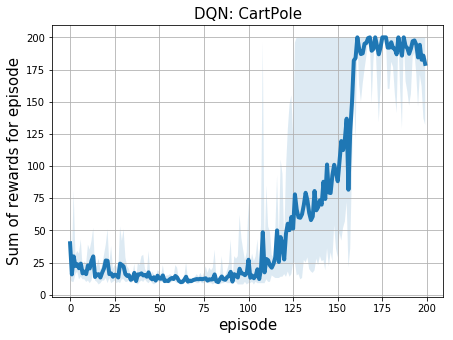

In [30]:
plot_results(cart_pole_results, 'DQN: CartPole', np.arange(n_episodes))

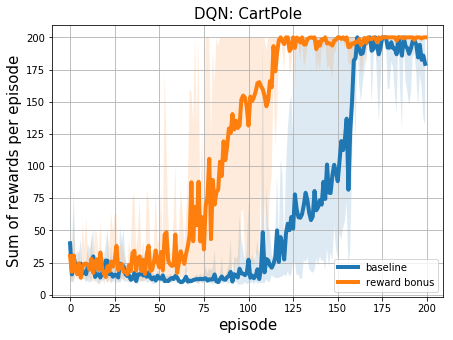

In [31]:
plot_results_different(cart_pole_results, ucb_cart_pole_results,  'DQN: CartPole', np.arange(n_episodes))

In [33]:
acrobot_results = np.load('run_experiments/results/dqn_environments/acrobot.npy')
n_seeds, n_episodes = acrobot_results.shape

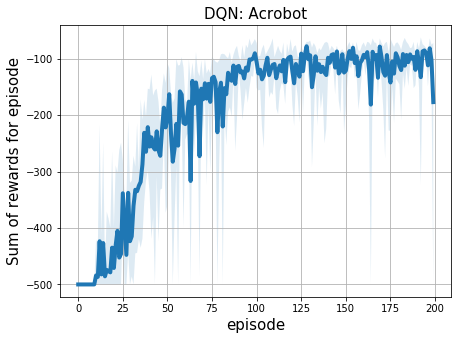

In [35]:
plot_results(acrobot_results, 'DQN: Acrobot', np.arange(n_episodes))

In [36]:
ucb_acrobot_results = np.load('run_experiments/results/dqn_environments/acrobot_ucb.npy')
n_seeds, n_episodes = ucb_acrobot_results.shape

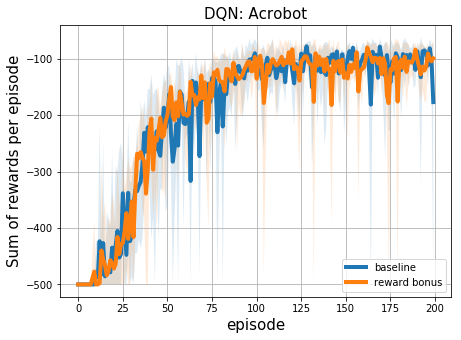

In [37]:
plot_results_different(acrobot_results, ucb_acrobot_results,  'DQN: Acrobot', np.arange(n_episodes))

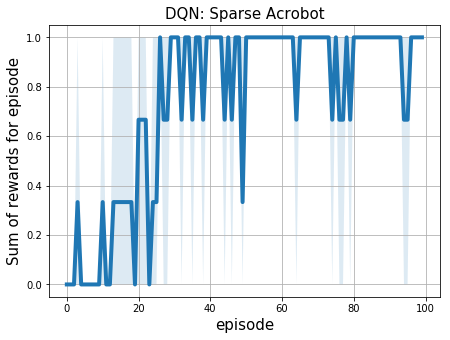

In [45]:
sparse_acrobot_results = np.load('run_experiments/results/dqn_environments/sparse_acrobot_low_eps.npy')
n_seeds, n_episodes = sparse_acrobot_results.shape
plot_results(sparse_acrobot_results, 'DQN: Sparse Acrobot', np.arange(n_episodes))

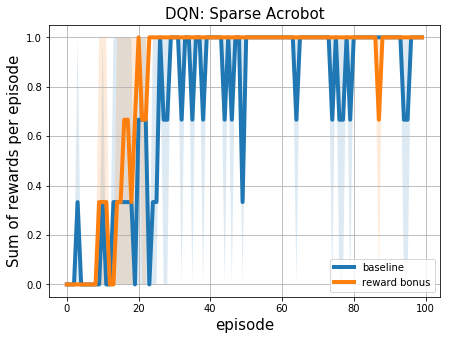

In [50]:
plot_results_different(sparse_acrobot_results, sparse_acrobot_ucb_results,
                       'DQN: Sparse Acrobot', np.arange(sparse_acrobot_results.shape[1]))

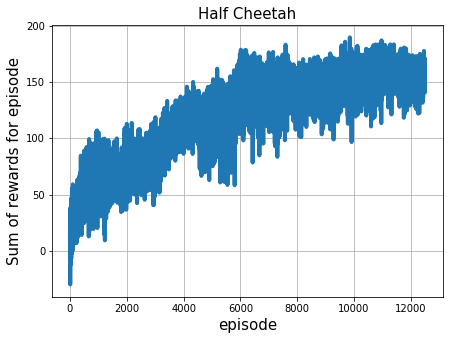

In [121]:
half_cheetah_results = np.load('results/trpo_environments/half_cheetah_rewards.npy')
if len(half_cheetah_results.shape) == 1:
    half_cheetah_results = half_cheetah_results[np.newaxis]
n_seeds, n_episodes = half_cheetah_results.shape
plot_results([half_cheetah_results], ['Half Cheetah'], np.arange(n_episodes))

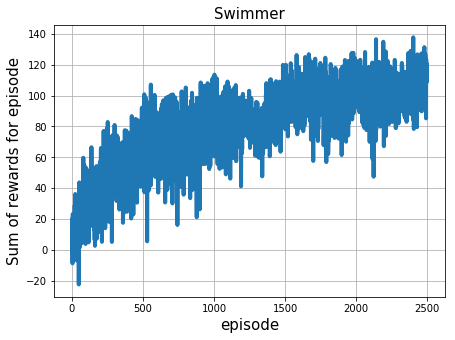

In [122]:
swimmer = np.load('results/trpo_environments/swimmer_rewards.npy')
if len(swimmer.shape) == 1:
    swimmer = swimmer[np.newaxis]
n_seeds, n_episodes = swimmer.shape
plot_results([swimmer], ['Swimmer'], np.arange(n_episodes))

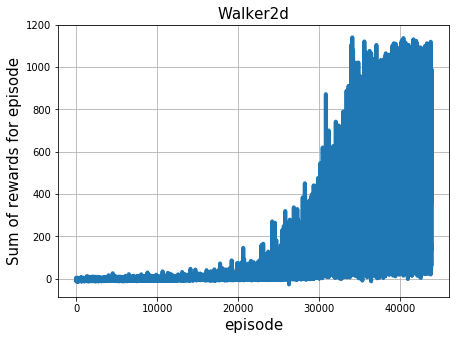

In [123]:
walker = np.load('results/trpo_environments/walker_rewards.npy')
if len(walker.shape) == 1:
    walker = walker[np.newaxis]
n_seeds, n_episodes = walker.shape
plot_results([walker], ['Walker2d'], np.arange(n_episodes))